# Final Assignment programming 1, Data Science for Life Sciences

In [2]:
"""
Author: Hendrik Reitsma
Project: Final assignment programming 1, Data Sciences for Life Scienes
Version: 1.00
Date: 16-02-2022
"""

'\nAuthor: Hendrik Reitsma\nProject: Final assignment programming 1, Data Sciences for Life Scienes\nVersion: 1.00\nDate: 16-02-2022\n'

# 1. Load, clean and join data

In [3]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import panel as pn
import holoviews as hv
from panel.template import DarkTheme
import folium
import scipy.stats

### 1.1 Load obesity

In [4]:
## Loading the data
df_obesity = pd.read_csv('data/data_obesity.csv', sep=',')

def clean_reshape_dataframe(df, column_name):
    """
    Function that cleans and reshapes the obesity and overweight dataframe.
    Input the dataframe that needs cleaning and reshaping, and the desired column name of the new column.
    """
    ## Cleaning the data
    df = df.drop([0,1])
    df=df.T
    df=df.reset_index(drop=False)

    # Update column labels
    new_header = df.iloc[0]
    df = df[1:] 
    df.columns = new_header 
    df.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)

    # Clean up the Year column
    df['Year'] = df['Year'].replace(['\.1', '\.2'], '', regex=True)
    df = df.rename(columns={'Country': 'Sex'})

    ## Reshape the data from wide to long
    df = df.melt(id_vars=['Year', 'Sex'], value_name = column_name)
    df = df.rename(columns={0: 'Country'})
    return df



df_obesity = clean_reshape_dataframe(df_obesity, column_name='Obesity')
df_obesity


,Year,Sex,Country,Obesity
0,2016,Both sexes,Afghanistan,5.5 [3.4-8.1]
1,2016,Male,Afghanistan,3.2 [1.3-6.4]
2,2016,Female,Afghanistan,7.6 [4.3-12.4]
3,2015,Both sexes,Afghanistan,5.2 [3.3-7.7]
4,2015,Male,Afghanistan,3.0 [1.3-6.0]
...,...,...,...,...
24565,1976,Male,Zimbabwe,0.5 [0.1-1.3]
24566,1976,Female,Zimbabwe,7.0 [3.3-12.4]
24567,1975,Both sexes,Zimbabwe,3.7 [1.7-6.5]
24568,1975,Male,Zimbabwe,0.4 [0.1-1.3]


What to do: import other csv files, clean up, give same column names and join together

### 1.2 Load ncd mortality

In [5]:
## Loading the data
df_mortality = pd.read_csv('data/data_ncd_mortality.csv', sep=',')

def clean_reshape_mortality(df_mortality):
    """
    Function that cleans and reshapes the mortality dataframe.
    Input the mortality dataframe.
    """
    ## Cleaning the data
    df_mortality = df_mortality.drop(['Noncommunicable diseases', 'Noncommunicable diseases.1', 'Noncommunicable diseases.2'], axis=1)
    df_mortality = df_mortality.drop([0])

    # Update column labels
    new_header = df_mortality.iloc[0]
    df_mortality = df_mortality[1:] 
    df_mortality.columns = new_header 
    df_mortality = df_mortality.reset_index(drop=True)
    df_mortality

    ## Reshape the data from wide to long
    df_mortality = df_mortality.melt(id_vars=['Year', 'Country'], value_name = 'Mortality per 100.000')
    df_mortality = df_mortality.rename(columns={1: 'Sex'})
    return df_mortality

df_mortality = clean_reshape_mortality(df_mortality)

### 1.3 Load overweight

In [6]:
## Loading the data
df_overweight = pd.read_csv('data/data_overweight.csv', sep=',')
df_overweight = clean_reshape_dataframe(df_overweight, column_name='Overweight')
df_overweight

,Year,Sex,Country,Overweight
0,2016,Both sexes,Afghanistan,23.0 [18.5-27.8]
1,2016,Male,Afghanistan,19.7 [13.6-27.1]
2,2016,Female,Afghanistan,26.1 [20.1-33.0]
3,2015,Both sexes,Afghanistan,22.3 [18.1-27.0]
4,2015,Male,Afghanistan,19.1 [13.2-26.2]
...,...,...,...,...
24565,1976,Male,Zimbabwe,8.1 [3.9-14.4]
24566,1976,Female,Zimbabwe,23.9 [16.0-33.0]
24567,1975,Both sexes,Zimbabwe,15.8 [11.0-21.4]
24568,1975,Male,Zimbabwe,7.9 [3.6-14.3]


### 1.4 Load alcohol

In [7]:
## Loading the data
df_alcohol = pd.read_csv('data/data_alcohol.csv', sep=',')

def clean_reshape_dataframe_alcohol(df):
    """
    Function that cleans, reshapes the alcohol dataframe.
    Input is df_alcohol
    """
    ## Cleaning the data
    ## Update column labels
    new_header = df.iloc[0]
    df = df[1:] 
    df.columns = new_header 

    df=df.T
    df.columns = df.iloc[0]
    df = df[1:]
    df=df.reset_index(drop=False)
    df.rename(columns = {'Country':'Sex', 0 : 'Year'}, inplace = True)

    ## Reshape the data from wide to long
    df = df.melt(id_vars=['Year', 'Sex'], value_name = 'Alcohol Consumed')
    df = df.rename(columns={np.NaN : 'Country'})
    return df

df_alcohol = clean_reshape_dataframe_alcohol(df_alcohol)
df_alcohol

,Year,Sex,Country,Alcohol Consumed
0,2019,Both sexes,Afghanistan,0.0 [0.0-0.1]
1,2019,Male,Afghanistan,0.0 [0.0-0.1]
2,2019,Female,Afghanistan,0
3,2018,Both sexes,Afghanistan,0.0 [0.0-0.1]
4,2018,Male,Afghanistan,0.0 [0.0-0.1]
...,...,...,...,...
11275,2001,Male,Zimbabwe,4.2 [3.5-5.4]
11276,2001,Female,Zimbabwe,0.9 [0.7-1.1]
11277,2000,Both sexes,Zimbabwe,2.5 [2.0-3.1]
11278,2000,Male,Zimbabwe,4.2 [3.5-5.4]


### 1.5 Join dataframes

In [8]:
def merge_dataframes(df):
    """
    Function that merges dataframes.
    Input is df_obesity.
    """
    df_list = [df_overweight, df_mortality, df_alcohol]
    for item in df_list:
        df = df.merge(item)

    return df

df = merge_dataframes(df_obesity)
df

,Year,Sex,Country,Obesity,Overweight,Mortality per 100.000,Alcohol Consumed
0,2016,Both sexes,Afghanistan,5.5 [3.4-8.1],23.0 [18.5-27.8],895.3 [473.3-1510.2],0
1,2016,Male,Afghanistan,3.2 [1.3-6.4],19.7 [13.6-27.1],869.4 [475.4-1436.7],0.0 [0.0-0.1]
2,2016,Female,Afghanistan,7.6 [4.3-12.4],26.1 [20.1-33.0],916.8 [470.3-1573.7],0
3,2015,Both sexes,Afghanistan,5.2 [3.3-7.7],22.3 [18.1-27.0],895.1 [473.1-1515.5],0
4,2015,Male,Afghanistan,3.0 [1.3-6.0],19.1 [13.2-26.2],876.0 [479.4-1451.2],0.0 [0.0-0.1]
...,...,...,...,...,...,...,...
9226,2001,Male,Zimbabwe,2.5 [1.3-4.3],16.9 [12.6-21.8],719.8 [437.3-1138.2],4.2 [3.5-5.4]
9227,2001,Female,Zimbabwe,18.5 [14.1-23.7],43.9 [38.6-49.5],544.2 [304.6-901.3],0.9 [0.7-1.1]
9228,2000,Both sexes,Zimbabwe,10.5 [8.1-13.3],30.4 [26.8-34.1],608.2 [353.7-985.1],2.5 [2.0-3.1]
9229,2000,Male,Zimbabwe,2.4 [1.2-4.1],16.5 [12.2-21.4],716.4 [437.9-1128.6],4.2 [3.5-5.4]


### 1.6 Clean values of interval

In [9]:
def remove_confidence(df):
    """
    Function that removes confidence interval from data.
    """
    column_list = ['Obesity', 'Overweight', 'Mortality per 100.000', 'Alcohol Consumed']
    for column in column_list:
        df[column] = df[column].str.split(pat = ' ', n=1, expand=True)[0]
        df[column] = df[column].astype(float)
    return df
df = remove_confidence(df)
df

,Year,Sex,Country,Obesity,Overweight,Mortality per 100.000,Alcohol Consumed
0,2016,Both sexes,Afghanistan,5.5,23.0,895.3,0.0
1,2016,Male,Afghanistan,3.2,19.7,869.4,0.0
2,2016,Female,Afghanistan,7.6,26.1,916.8,0.0
3,2015,Both sexes,Afghanistan,5.2,22.3,895.1,0.0
4,2015,Male,Afghanistan,3.0,19.1,876.0,0.0
...,...,...,...,...,...,...,...
9226,2001,Male,Zimbabwe,2.5,16.9,719.8,4.2
9227,2001,Female,Zimbabwe,18.5,43.9,544.2,0.9
9228,2000,Both sexes,Zimbabwe,10.5,30.4,608.2,2.5
9229,2000,Male,Zimbabwe,2.4,16.5,716.4,4.2


### 1.7 Get coordinates (takes 4+ minutes)
Geolocator is used to get coordinates for all countries. This takes a lot of time.
Read df_country.csv to save time

In [10]:
## Code that adds latitude and longitude per country
## It takes 4+ minutes to run so df_country is written to csv and read again to save time.

# df_country = df.groupby('Country').mean().reset_index()
# geolocator = Nominatim(user_agent='Final_Assignment_2021')
# df_country['latitude'] = df_country['Country'].apply(geolocator.geocode).apply(lambda x: (x.latitude))
# df_country['longitude'] = df_country['Country'].apply(geolocator.geocode).apply(lambda x: (x.longitude))
# df_country['geometry'] = df_country['Country'].apply(geolocator.geocode)
# df_country.to_csv('df_country.csv')
# df_country

In [11]:
df_country = pd.read_csv('data/df_country.csv')

In [12]:
## Drop all columns but country and coordinates
df_country = df_country.drop(['Obesity', 'Overweight', 'Mortality per 100.000', 'Alcohol Consumed'], axis=1)


In [13]:
df_country_copy = df_country.copy()
## Add coordinates to dataframe on country
df_coord = df.join(df_country_copy.set_index('Country'), on='Country')
df_coord

,Year,Sex,Country,Obesity,Overweight,Mortality per 100.000,Alcohol Consumed,Unnamed: 0,latitude,longitude,geometry
0,2016,Both sexes,Afghanistan,5.5,23.0,895.3,0.0,0,33.768006,66.238514,افغانستان
1,2016,Male,Afghanistan,3.2,19.7,869.4,0.0,0,33.768006,66.238514,افغانستان
2,2016,Female,Afghanistan,7.6,26.1,916.8,0.0,0,33.768006,66.238514,افغانستان
3,2015,Both sexes,Afghanistan,5.2,22.3,895.1,0.0,0,33.768006,66.238514,افغانستان
4,2015,Male,Afghanistan,3.0,19.1,876.0,0.0,0,33.768006,66.238514,افغانستان
...,...,...,...,...,...,...,...,...,...,...,...
9226,2001,Male,Zimbabwe,2.5,16.9,719.8,4.2,180,-18.455496,29.746841,Zimbabwe
9227,2001,Female,Zimbabwe,18.5,43.9,544.2,0.9,180,-18.455496,29.746841,Zimbabwe
9228,2000,Both sexes,Zimbabwe,10.5,30.4,608.2,2.5,180,-18.455496,29.746841,Zimbabwe
9229,2000,Male,Zimbabwe,2.4,16.5,716.4,4.2,180,-18.455496,29.746841,Zimbabwe


### 1.8 Filter and add to dataframe


In [14]:
## Create a dataframe with just european countries.
df = df_coord.copy()

european_countries = np.array(['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Latvia', 
       'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Republic of Moldova', 'North Macedonia', 'Romania', 'Russian Federation', 
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 
       'Ukraine', 'United Kingdom of Great Britain and Northern Ireland',
        ], dtype=object)

df_europe = df.loc[df['Country'].isin(european_countries)]
df_europe

,Year,Sex,Country,Obesity,Overweight,Mortality per 100.000,Alcohol Consumed,Unnamed: 0,latitude,longitude,geometry
51,2016,Both sexes,Albania,21.7,57.7,527.5,6.6,1,41.000028,19.999962,Shqipëria
52,2016,Male,Albania,21.6,64.4,581.7,10.6,1,41.000028,19.999962,Shqipëria
53,2016,Female,Albania,21.8,51.1,470.3,2.5,1,41.000028,19.999962,Shqipëria
54,2015,Both sexes,Albania,21.1,57.0,513.9,6.4,1,41.000028,19.999962,Shqipëria
55,2015,Male,Albania,20.9,63.6,581.4,10.3,1,41.000028,19.999962,Shqipëria
...,...,...,...,...,...,...,...,...,...,...,...
8716,2001,Male,United Kingdom of Great Britain and Northern I...,17.6,60.2,564.9,21.6,170,54.702354,-3.276575,United Kingdom
8717,2001,Female,United Kingdom of Great Britain and Northern I...,20.6,50.7,380.9,6.7,170,54.702354,-3.276575,United Kingdom
8718,2000,Both sexes,United Kingdom of Great Britain and Northern I...,18.6,54.8,447.4,13.9,170,54.702354,-3.276575,United Kingdom
8719,2000,Male,United Kingdom of Great Britain and Northern I...,17.1,59.6,552.2,21.6,170,54.702354,-3.276575,United Kingdom


# 2 Data exploration
### 2.1 Explore data with plots

Curvefit:   
-16.91 x + 1453
Degrees Of Freedom:  42
r value:  -0.33988825205967343
p value:  0.023987525207079412
R-squared:  0.1155240238881801


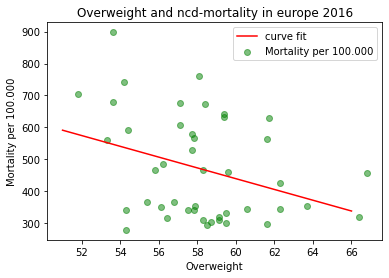

In [15]:
def scatter_plot(x,y,deg,title):
    """
    Function that makes a scatterplot and prints relevant pearson correlation parameters.
    Input: x-values, y-values, deg (1 for linear) and desired title of plot.
    """
    plt.scatter(x=x, y=y, c="g", alpha=0.5,
            label=y.name)
    coef = np.polyfit(x=x, y=y, deg=deg)
    curvefit = np.poly1d(coef)
    print('Curvefit: ', curvefit)
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    print('Degrees Of Freedom: ', len(y)-2)
    print('r value: ', r_value)
    print('p value: ', p_value)

    print('R-squared: ', r_value**2)
    
    xi = np.linspace(int(min(x)), int(max(x)), len(x))
    yi = curvefit(xi)
    
    plt.plot(xi, yi, '-r', label='curve fit')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

df_netherlands = df.loc[((df['Sex'] == 'Both sexes') & (df['Country'] == 'Netherlands'))]
df_europe_2016 = df_europe.loc[((df_europe['Sex'] == 'Both sexes') & (df_europe['Year'] == '2016'))]
scatter_plot(x=df_europe_2016['Overweight'], y=df_europe_2016['Mortality per 100.000'], deg = 1, title='Overweight and ncd-mortality in europe 2016')

Curvefit:   
-0.3334 x + 572.1
Degrees Of Freedom:  2242
r value:  -0.009009139981673504
p value:  0.6697131480498585
R-squared:  8.116460320938806e-05


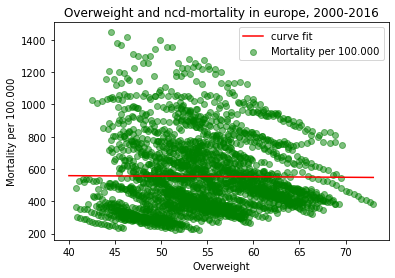

In [16]:
scatter_plot(x=df_europe['Overweight'], y=df_europe['Mortality per 100.000'], deg = 1, title='Overweight and ncd-mortality in europe, 2000-2016')

Curvefit:   
-18.91 x + 919.1
Degrees Of Freedom:  2242
r value:  -0.30147133143091037
p value:  2.2757972501821076e-48
R-squared:  0.0908849636747258


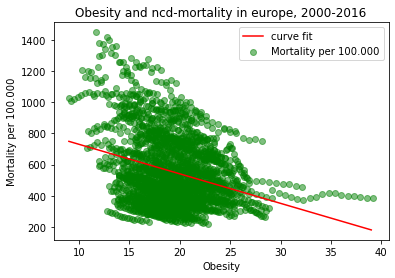

In [17]:
scatter_plot(x=df_europe['Obesity'], y=df_europe['Mortality per 100.000'], deg = 1, title='Obesity and ncd-mortality in europe, 2000-2016')

### 2.2 Scatterplots for dashboard

In [18]:
def obesity_scatter_correlation_plot(year, sex):
    """
    Function that makes a scatterplot with slope for the dashboard.
    Inputs are year and sex
    """
    df = df_europe[df_europe['Year'] == year]
    df = df[df['Sex'] == sex]
    scatter = hv.Scatter(df,kdims = ['Obesity'],  vdims=['Mortality per 100.000'], label='Mortality per 100.000 and obesity')
    p = hv.Overlay([scatter]).opts(
        responsive=True,
        min_height=400,
        min_width=500,
        xlabel='Obesity', 
        ylabel='Mortality per 100.000', 
        title='Obesity and mortality',
        legend_position='bottom_right') * hv.Slope.from_scatter(scatter).opts(
            responsive=True,
            min_height=400,
            min_width=500,
            line_dash='dotted',
            color = 'orange'
        )
    return p

def overweight_scatter_correlation_plot(year, sex):
    """
    Function that makes a scatterplot with slope for the dashboard.
    Inputs are year and sex
    """
    df = df_europe[df_europe['Year'] == year]
    df = df[df['Sex'] == sex]
    scatter = hv.Scatter(df,kdims = ['Overweight'],  vdims=['Mortality per 100.000'], label='Mortality per 100.000 and overweight')
    p = hv.Overlay([scatter]).opts(
        responsive=True,
        min_height=400,
        min_width=500,
        xlabel='Overweight', 
        ylabel='Mortality per 100.000', 
        title='Overweight and mortality',
        legend_position='bottom_right') * hv.Slope.from_scatter(scatter).opts(
            responsive=True,
            min_height=400,
            min_width=500,
            line_dash='dotted',
            color = 'orange'
        )
    return p


### 2.3 Create folium map, for dashboard

In [19]:
this_map = folium.Map(prefer_canvas=True, tiles='Stamen Toner')

def plotDot(point):
    """
    Input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to this_map
    """
    p = folium.CircleMarker(location=[point.latitude, point.longitude],
                        popup = 
                        "Country: " + str(point.Country) + '<br>' +
                        "Overweight: " + str(point.Overweight) + '<br>' +
                        "Obesity: " + str(point.Obesity) + '<br>' +
                        "Mortality per 100.000: " + str(point['Mortality per 100.000']) + '<br>',                        
                        radius=5,
                        weight=5).add_to(this_map)
    return p

def apply_to_map(year, sex):
    """
    Applies plotDot function to dataframe.
    """
    df = df_europe[df_europe['Year'] == year]
    df = df[df['Sex'] == sex]
    df.apply(plotDot, axis = 1)

    #Set the zoom to the maximum possible
    this_map.fit_bounds(this_map.get_bounds())
    return this_map

#View map
apply_to_map('2016', 'Both sexes')

### 2.4 Ranking of countries compared to europe, for dashboard

In [20]:
df_ranking = df_europe.loc[((df_europe['Sex'] == 'Both sexes') & (df_europe['Year'] == '2016'))]
rankings = ['Obesity','Overweight','Mortality per 100.000','Alcohol Consumed', 'Mortality/Obesity Ratio']

def ranking_per_country(country):
    """
    Function that adds prints the ranking for each risk factor per country to the dashboard.
    Input variable is country.
    """
    ranking_dict = {}
    for rank in rankings:
        df_ranking = df_europe.loc[((df_europe['Sex'] == 'Both sexes') & (df_europe['Year'] == '2016'))]
        df_ranking['Mortality/Obesity Ratio'] = round(df_ranking['Mortality per 100.000']/df_ranking['Obesity'], 2)
        df_ranking = df_ranking.sort_values(rank, ascending=False)
        df_ranking = df_ranking.reset_index(drop=True)
        df_ranking = df_ranking.reset_index()
        ranking_dict[rank] = str(int(df_ranking.loc[df_ranking['Country'] == country, 'index'].iloc[0])+1) + ' out of ' + str(len(df_ranking))

    values_dict = {}
    for rank in rankings:
        value = df_ranking.loc[df_ranking['Country'] == country, rank].iloc[0]

        if rank == 'Obesity' or rank == 'Overweight':
            value_unit = str(value) + '%'
        elif rank == 'Mortality per 100.000' or rank == 'Mortality/Obesity Ratio':
            value_unit = str(value)
        elif rank == 'Alcohol Consumed':
            value_unit = str(value) + 'L'
            
        values_dict[rank] = value_unit

    return ranking_dict, values_dict

def format_ranking_per_country(country):
    """
    Function that formats the result for the dashboard
    """
    value_ranking = ''    
    for rank in rankings:
        value_ranking += rank + ': ' + ranking_per_country(country)[1][rank] + ', ' + ranking_per_country(country)[0][rank] + '; '
    return value_ranking

# 3. Statistics

In this section some statistics are done

In [21]:
# colls = ['Obesity', 'Overweight', 'Mortality per 100.000', 'Alcohol Consumed']
# df_europe_corr = df_europe[colls].corr()

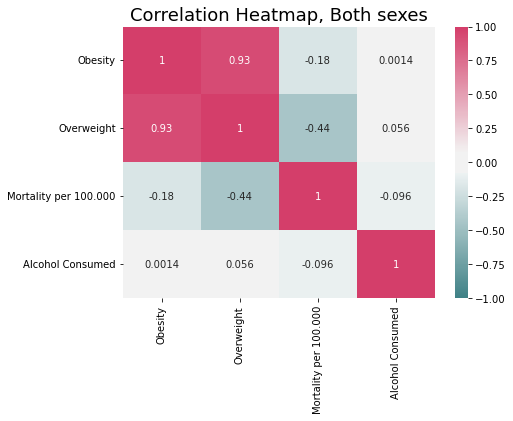

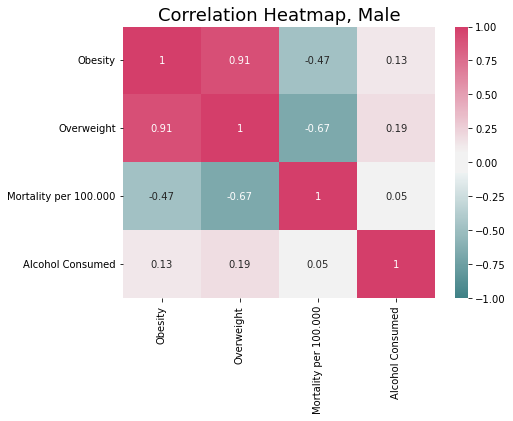

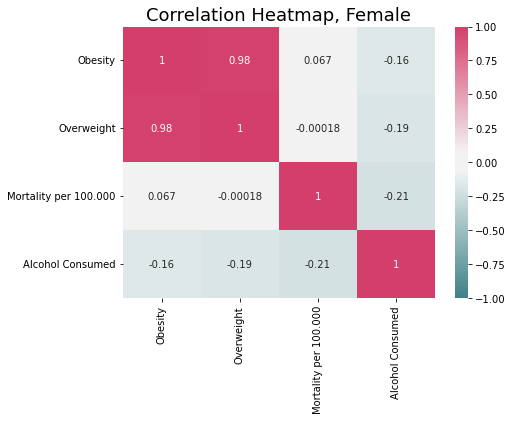

In [22]:
def correlation_heatmap(sex):
    """
    Function that shows a correlation heatmap with r values annotated.
    """
    colls = ['Obesity', 'Overweight', 'Mortality per 100.000', 'Alcohol Consumed']
    df = df_europe.loc[(df_europe['Sex'] == sex)]
    df_europe_corr = df[colls].corr()
    plt.rcParams["figure.figsize"] = (7, 5)
    cmap = sns.diverging_palette(h_neg = 200, h_pos = 360, s = 74, l= 50, sep=20, n=11, center='light',as_cmap=True)
    title = 'Correlation Heatmap, ' + sex
    plt.title(title, fontsize=18)
    sns.heatmap(df_europe_corr, annot = True, cmap=cmap, vmin=-1, vmax=1)
    plt.show()

sexes = ['Both sexes', 'Male', 'Female']

for sex in sexes:
    correlation_heatmap(sex)

In [23]:
## Run this code to interactively choose diverging_palette parameters
# sns.choose_diverging_palette()

Europe Both sexes :
Curvefit:   
-10.78 x + 750.3
Degrees Of Freedom:  746
r value:  -0.18412013104211816
p value:  3.965645132232069e-07
R-squared:  0.03390022265496676


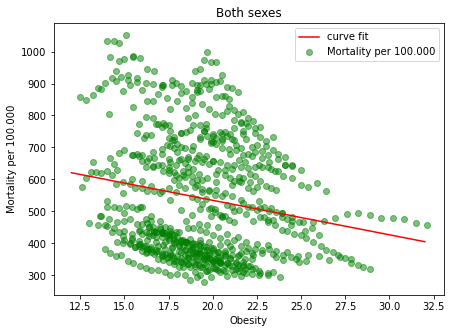

Netherlands Both sexes :
Curvefit:   
-18.94 x + 707
Degrees Of Freedom:  15
r value:  -0.9725619090939368
p value:  6.571690217967628e-11
R-squared:  0.945876667020443


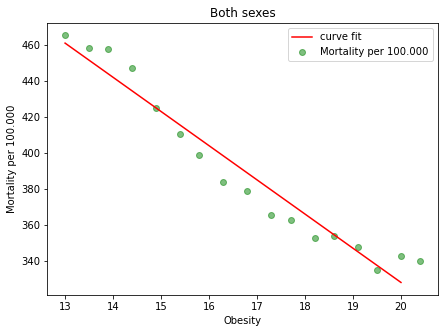

Europe Male :
Curvefit:   
-33.18 x + 1297
Degrees Of Freedom:  746
r value:  -0.46930402567782353
p value:  3.105075665900473e-42
R-squared:  0.22024626851741125


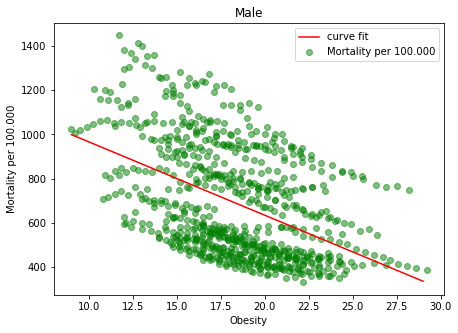

Netherlands Male :
Curvefit:   
-24.18 x + 870.4
Degrees Of Freedom:  15
r value:  -0.975521812370744
p value:  2.8157425216847543e-11
R-squared:  0.951642806411101


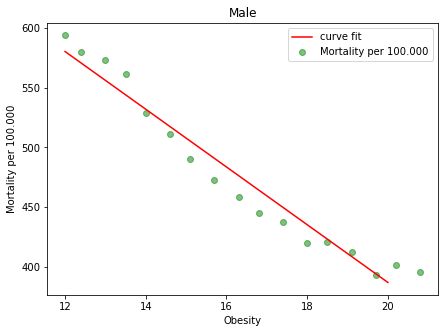

Europe Female :
Curvefit:   
2.633 x + 377.6
Degrees Of Freedom:  746
r value:  0.06737992670719145
p value:  0.06550077441910082
R-squared:  0.004540054523066492


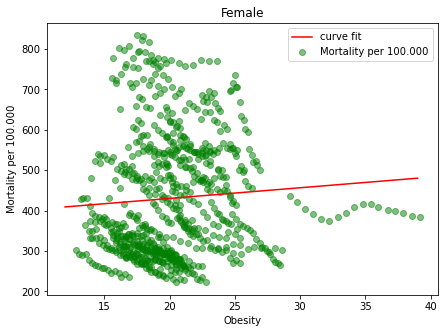

Netherlands Female :
Curvefit:   
-15.31 x + 586.4
Degrees Of Freedom:  15
r value:  -0.9658566756653345
p value:  3.32169594104545e-10
R-squared:  0.9328791179272912


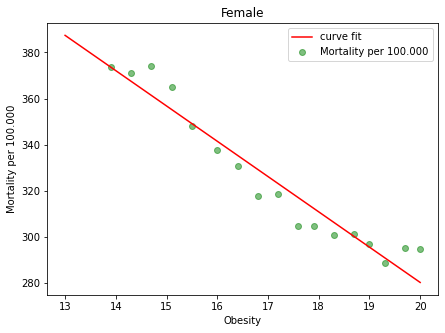

In [24]:
## Linear regression, a and b and R-squared for europe and The Netherlands

def linear_regression(sex, country):
    """
    Function that shows scatterplots with relevant pearson correlation parameters.
    Input variables are sex and country.
    """
    if country == 'Europe':
        df = df_europe.loc[(df_europe['Sex'] == sex)]
        print(country, sex, ':')
        return scatter_plot(x=df['Obesity'], y=df['Mortality per 100.000'], deg = 1, title = sex)
    else:
        df = df_europe.loc[(df_europe['Sex'] == sex) & (df_europe['Country'] == country)]
        print(country, sex, ':')
        return scatter_plot(x=df['Obesity'], y=df['Mortality per 100.000'], deg = 1, title = sex)

for sex in sexes:
    linear_regression(sex, country = 'Europe')
    linear_regression(sex, country = 'Netherlands')

# 4. Dashboard

In this section the code for the dashboard can be found

In [25]:
## Widgets
years = ['2000', '2001', '2003','2004','2005','2006','2007','2008','2009',
         '2010','2011','2012','2013','2014','2015','2016']
sexes = ['Male','Female','Both sexes']
countries = list(df_ranking['Country'].unique())

year_widget = pn.widgets.Select(name='Year', options=years, width=100, height=50)
sex_widget = pn.widgets.RadioBoxGroup(name='Sex',options=sexes, width=100, height=50)
country_widget = pn.widgets.Select(name='Country', options=countries, width=100, height=50)

In [26]:
## Binders
obesity_correlation = pn.bind(obesity_scatter_correlation_plot, year = year_widget, sex = sex_widget)
overweight_correlation = pn.bind(overweight_scatter_correlation_plot, year = year_widget, sex = sex_widget)
ranking = pn.bind(format_ranking_per_country, country = country_widget)
map = pn.bind(apply_to_map, year = year_widget, sex = sex_widget)

In [27]:
## Dashboard
template = pn.template.MaterialTemplate(
    site="Programming 1 Final Assignment", 
    title="Obesity and non-communicable diseases",
    header_background  = 'cyan', 
    theme = DarkTheme,
    sidebar_width = 200, 
    sidebar=[pn.pane.Markdown("## Settings"), country_widget, year_widget, sex_widget],
)
template.main.append(
    pn.Row(
        pn.pane.Markdown('## Values and ranking of selected country compared to the rest of europe')
    )
)
template.main.append(
    pn.Row(
        ranking
    )
)
template.main.append(
    pn.Row(
        pn.pane.Markdown('## Scatterplots of all european countries, selected year and sex')
    )
)
template.main.append(
    pn.Row(
        pn.Card(hv.DynamicMap(obesity_correlation), title='Obesity'),
        pn.Card(hv.DynamicMap(overweight_correlation), title='Overweight')
    )
)
template.main.append(
    pn.Row(
        pn.pane.Markdown('## Map of europe with data from 2016 and both sexes'),
    )
)
template.main.append(
    pn.Row(
        pn.pane.plot.Folium(apply_to_map('2016', 'Both sexes'), height=400),  
    )
)
template.show()

Launching server at http://localhost:65017


C:\Users\Hendrik\AppData\Local\Temp/ipykernel_18952/1156795069.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ranking['Mortality/Obesity Ratio'] = round(df_ranking['Mortality per 100.000']/df_ranking['Obesity'], 2)
